# Simple linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv(r'C:\Users\Iwona\Downloads\Resources\Downloaded csv files for portfolio\real estate price\real_estate_price_size_year_view.csv')
raw_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [3]:
data = raw_data[['price','size']]
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
data.isnull().sum()

price    0
size     0
dtype: int64

In [5]:
# Declaring the dependent and the independent variables
y = data ['price'] # dependant
x1 = data ['size'] # independent

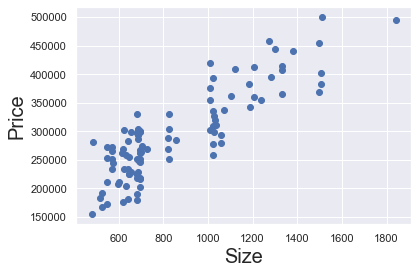

In [6]:
plt.scatter(x1,y)
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

In [7]:
x = sm.add_constant(x1)
# Fiting the model, according to the OLS method
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           8.13e-31
Time:                        00:47:41   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# The intercept is equal to 101900 and the slope coefitient is equal to 223.1787
# Once the coefitients of the regression is known we can start ploting and predicting.

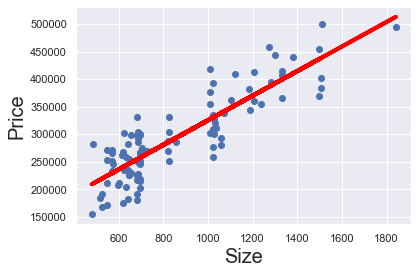

In [9]:
plt.scatter(x1,y)
# Define the regression equation
yhat = 223.178*x1 + 101900.00
fig = plt.plot(x1,yhat, lw=4, c='red', label ='regression line')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

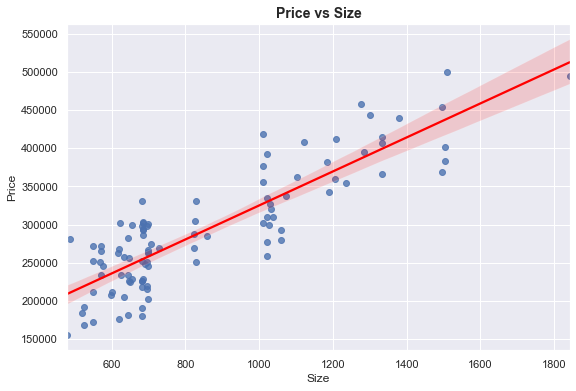

In [17]:
# Or simply use seaborn for regression plotting, which is a quicker and better looking option.

sns.set(rc = {'figure.figsize': (9,6)}) 
sns.regplot(x = "size", 
            y = "price", 
            data = data, 
            scatter_kws = {'color': 'b'}, 
            line_kws = {'color': 'red'}) 
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Price vs Size", fontsize = 14, weight = "bold")
plt.show()

# Multiple linear regression

#### We can perfom multiple linear regressoin analysis by adding the new variable.

In [13]:
data2 = raw_data[['price','size','year']]
data2.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [14]:
# Declaring the dependent and the independent variables
y = data2 ['price']
x1 = data2 [['size','year']]

In [15]:
x = sm.add_constant(x1)
# Fiting the model, according to the OLS
results = sm.OLS(y,x).fit()

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           2.77e-32
Time:                        00:50:18   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""